# Runtime Analysis
This notebook is designed to compare output two or more ACCESS-OM2 simulations. 

In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [6]:
#client = Client(n_workers=4)
# >> dask-scheduler
# >> dask-worker tcp://10.0.64.9:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.9:8786', local_dir='/local/g40/amh157')
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38955 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.48 GB


In [3]:
session = cc.database.create_session('ryf9091.db')

In [4]:
exptdict = OrderedDict([
    ('01deg_RYF9091',   {'expt':'01deg_jra55v13_ryf9091','dir':'access-om2-01'}),
    ('01deg_RYF8485',   {'expt':'01deg_jra55v13_ryf8485_spinup6','dir':'access-om2-01'}),
    ('025deg_RYF9091',  {'expt':'025deg_jra55v13_ryf9091_gmredi6','dir':'access-om2-025'})
                        ])

In [5]:
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    dir = exptdict[ekey]['dir']
    cc.database.build_index('/g/data/hh5/tmp/cosima/'+dir+'/'+expt,session,update=True)

Indexing experiment: 01deg_jra55v13_ryf9091


0it [00:00, ?it/s]


Indexing experiment: 01deg_jra55v13_ryf8485_spinup6


0it [00:00, ?it/s]


Indexing experiment: 025deg_jra55v13_ryf9091_gmredi6


100%|██████████| 4111/4111 [03:58<00:00, 17.21it/s]


## Scalar diagnostics

In [6]:
def plot_timeseries(variable):
    plt.figure(figsize=(10,5))
    for ekey in exptdict.keys():
        expt = exptdict[ekey]['expt']
        var = cc.querying.getvar(expt,variable,session)
        var.resample(time='Y').mean().plot(label=ekey)
    plt.title(variable)
    plt.legend()
    return

### Global Average Temperature

CPU times: user 16.7 s, sys: 1.19 s, total: 17.9 s
Wall time: 37.3 s


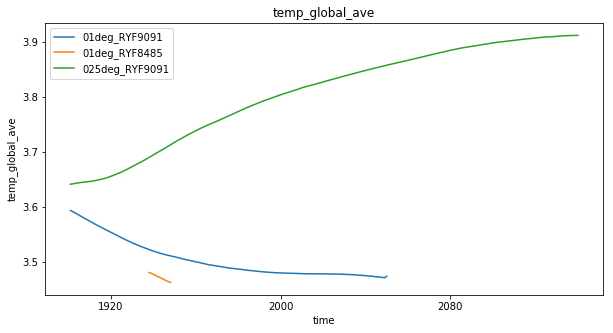

In [7]:
%%time
plot_timeseries('temp_global_ave')

### Global Average Salinity

CPU times: user 16.2 s, sys: 974 ms, total: 17.2 s
Wall time: 30.6 s


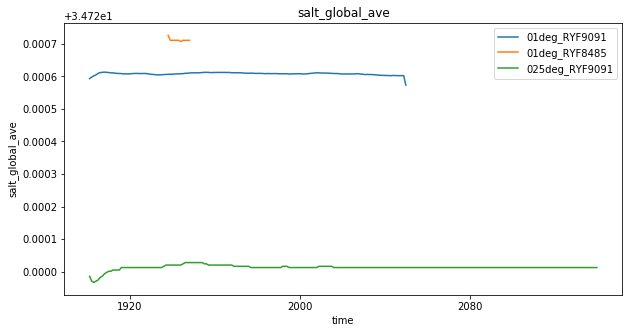

In [8]:
%%time
plot_timeseries('salt_global_ave')

### Surface Temperature

CPU times: user 16.7 s, sys: 1.06 s, total: 17.7 s
Wall time: 31.1 s


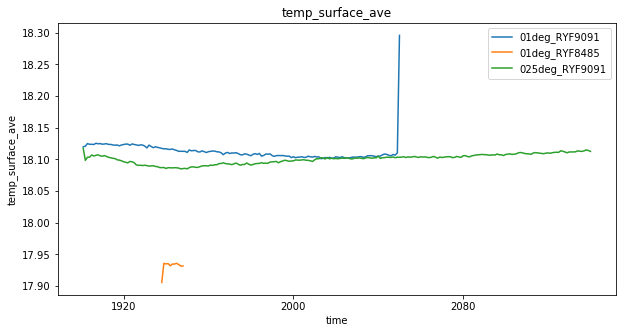

In [9]:
%%time
plot_timeseries('temp_surface_ave')

### Surface Salinity

CPU times: user 17.3 s, sys: 1.02 s, total: 18.3 s
Wall time: 32 s


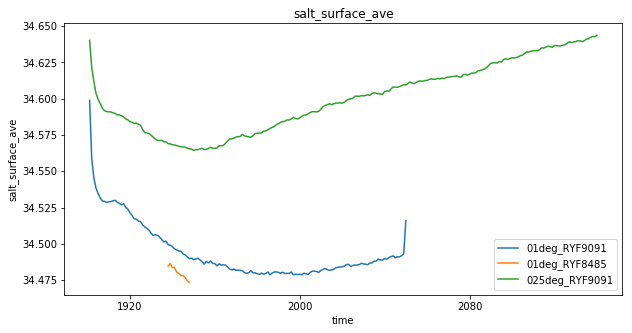

In [10]:
%%time
plot_timeseries('salt_surface_ave')

### Total Kinetic Energy

CPU times: user 16.6 s, sys: 965 ms, total: 17.6 s
Wall time: 30.9 s


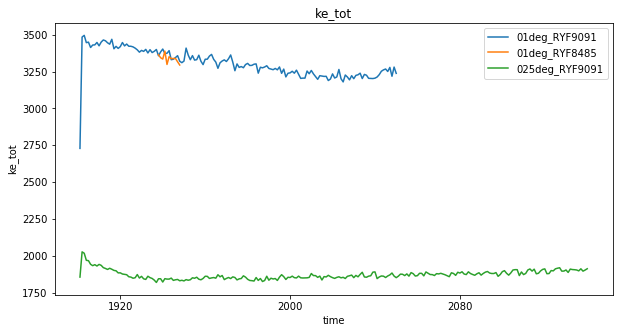

In [11]:
%%time
plot_timeseries('ke_tot')

## Area-Averaged Tracer Diagnostics

In [17]:
def plot_upper_ocean(variable):
    plt.figure(figsize=(10,5))
    zlevel = 1000
    for ekey in exptdict.keys():
        expt = exptdict[ekey]['expt']
        print(expt)
        var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc')
        varmean = var.sel(st_ocean = slice(0,zlevel)).mean('st_ocean').mean('yt_ocean').mean('xt_ocean').resample(time='Y').mean()
        varmean.plot(label=ekey)
    plt.legend()
    plt.title('Upper Ocean (< '+str(zlevel)+') '+variable)

### Upper Ocean Temperature/Salinity

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 52min 53s, sys: 4min 3s, total: 56min 56s
Wall time: 1h 17min 16s


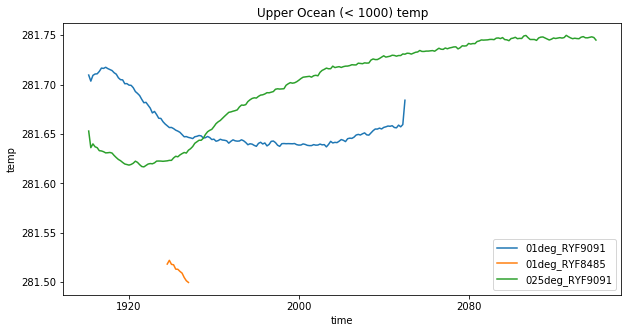

In [18]:
%%time
plot_upper_ocean('temp')

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 50min 8s, sys: 4min 23s, total: 54min 31s
Wall time: 1h 15min 33s


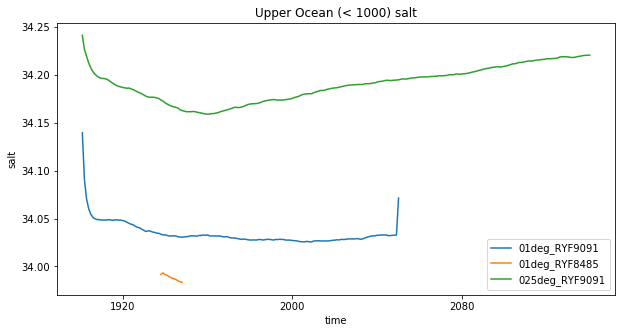

In [19]:
%%time
plot_upper_ocean('salt')

### Deep Ocean Temperature/Salinity

In [20]:
def plot_lower_ocean(variable):
    plt.figure(figsize=(10,5))
    zlevel = 3000
    for ekey in exptdict.keys():
        expt = exptdict[ekey]['expt']
        print(expt)
        var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc')
        varmean = var.sel(st_ocean = slice(zlevel,None)).mean('st_ocean').mean('yt_ocean').mean('xt_ocean').resample(time='Y').mean()
        varmean.plot(label=ekey)
    plt.legend()
    plt.title('Deep Ocean (> '+str(zlevel)+') '+variable)
    

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 18min 12s, sys: 1min 2s, total: 19min 14s
Wall time: 25min 43s


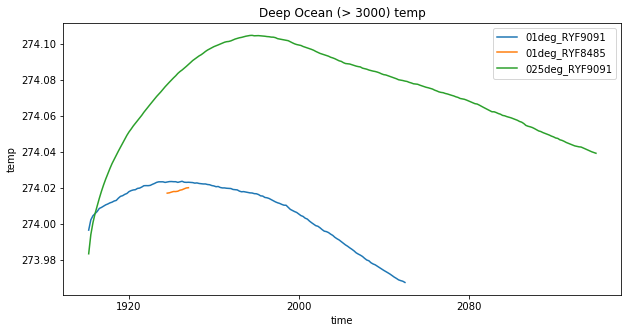

In [21]:
%%time
plot_lower_ocean('temp')

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 18min 31s, sys: 1min 5s, total: 19min 37s
Wall time: 26min 4s


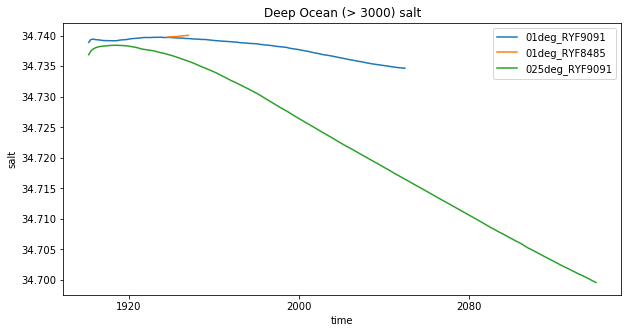

In [22]:
%%time
plot_lower_ocean('salt')

## Circulation Diagnostics

### Drake Passage Transport

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 44.4 s, sys: 2.69 s, total: 47.1 s
Wall time: 1min 25s


Text(0.5, 1.0, 'ACC Transport')

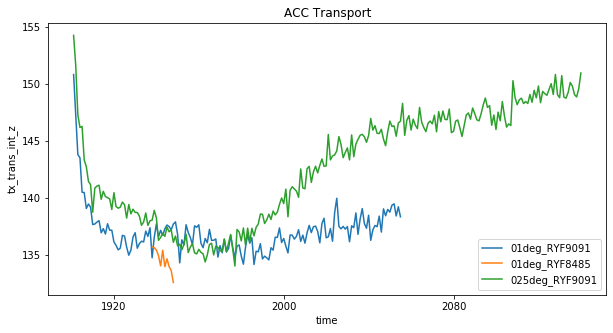

In [7]:
%%time

xmin=-69.9
ymin=-71.6
ymax=-51.0

variable='tx_trans_int_z'
plt.figure(figsize=(10,5))
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    DP = var.sel(xu_ocean=xmin, method='nearest').sel(yt_ocean=slice(ymin, ymax)).sum('yt_ocean').resample(time='Y').mean()/1e6/1036
    DP.plot(label=ekey)

plt.legend()
plt.title("ACC Transport")

### AABW overturning circulation @ 55°S

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 14min 56s, sys: 38.5 s, total: 15min 34s
Wall time: 18min 40s


Text(0.5, 1.0, 'AABW Cell')

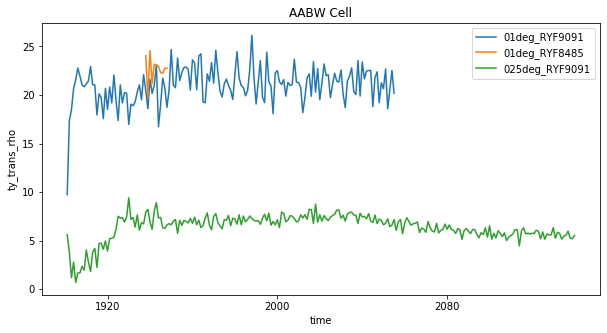

In [8]:
%%time
latitude=-55
plt.figure(figsize=(10,5))
variable='ty_trans_rho'
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    psi_aabw = var.sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
    psi_aabw_sum = psi_aabw.cumsum('potrho') - psi_aabw.sum('potrho')
    psi_aabw_sum = -psi_aabw_sum.sel(potrho=slice(1036.2,None)).min('potrho').resample(time='Y').mean()
    psi_aabw_sum.plot(label=ekey)
plt.legend()
plt.title('AABW Cell')

### AMOC Overturning @ 26°N

01deg_jra55v13_ryf9091
01deg_jra55v13_ryf8485_spinup6
025deg_jra55v13_ryf9091_gmredi6
CPU times: user 7min 45s, sys: 18.6 s, total: 8min 4s
Wall time: 10min 6s


Text(0.5, 1.0, 'AMOC Cell')

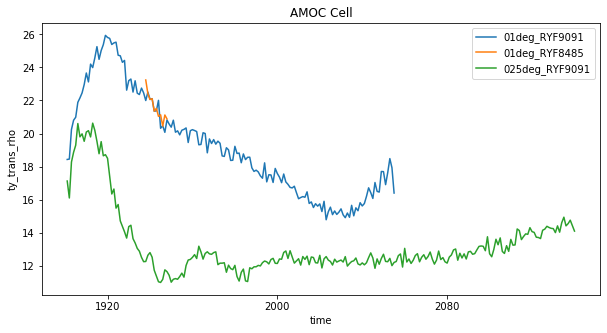

In [9]:
%%time
plt.figure(figsize=(10,5))
variable='ty_trans_rho'
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session)
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey)
plt.legend()
plt.title('AMOC Cell')

In [15]:
def plot_psi(psi_avg, clev=np.arange(-25,25,2)):
    plt.figure(figsize=(12,8))
    p1 = plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, 
                 psi_avg, 
                 cmap=cm.cm.delta,levels=clev,extend='both')
    plt.contour(psi_avg.grid_yu_ocean, 
                psi_avg.potrho, 
                psi_avg, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi_avg.grid_yu_ocean,
                psi_avg.potrho, psi_avg,
                levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    
    return p1

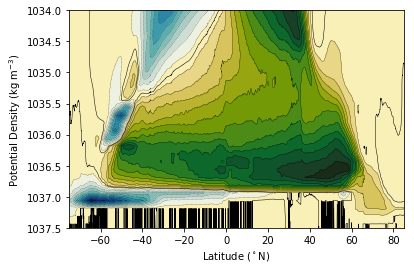

In [8]:
psi = cc.querying.getvar('01deg_jra55v13_ryf9091','ty_trans_rho',session,start_time='1950-01-01', end_time='1960-01-01')
psi = psi.mean('time').sum('grid_xt_ocean')*1.0e-9
psi_avg = psi.cumsum('potrho') -  psi.sum('potrho')
plot_psi(psi_avg)

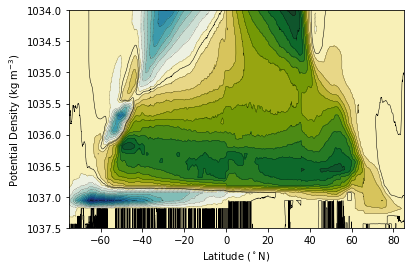

In [9]:
psi = cc.querying.getvar('01deg_jra55v13_ryf9091','ty_trans_rho',session,start_time='2000-01-01', end_time='2010-01-01')
psi = psi.mean('time').sum('grid_xt_ocean')*1.0e-9
psi_avg = psi.cumsum('potrho') -  psi.sum('potrho')
plot_psi(psi_avg)

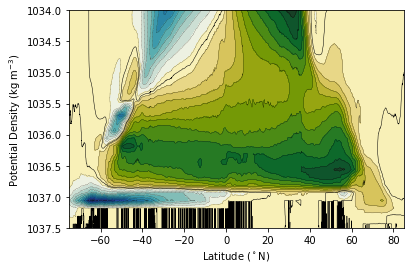

In [16]:
psi = cc.querying.getvar('01deg_jra55v13_ryf9091','ty_trans_rho',session,start_time='2039-01-01', end_time='2049-01-01')
psi = psi.mean('time').sum('grid_xt_ocean')*1.0e-9
psi_avg = psi.cumsum('potrho') -  psi.sum('potrho')
plot_psi(psi_avg)

### Ice Area (in both hemispheres)

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 720x648 with 0 Axes>

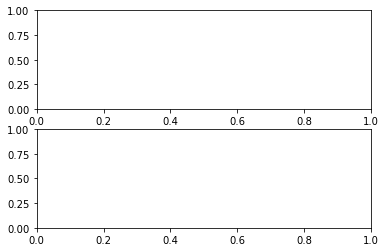

In [23]:
variable='aice_m'
plt.figure(figsize=(10,9))
ax = plt.subplots(2,1)
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session)
    area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
    var.coords['ni'] = area_t['xt_ocean'].values
    var.coords['nj'] = area_t['yt_ocean'].values
    var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
    area = var*area_t
    area_zonalsum = area.sum('xt_ocean')
    NH_area = area_zonalsum.sel(yt_ocean=slice(45, 90)).sum('yt_ocean').load()
    NH_area.plot(ax=ax[0],label=ekey)
    SH_area = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
    SH_area.plot(ax=ax[1],label=ekey)
plt.legend()
ax[0].set_title('Arctic')
ax[1].set_title('Southern Ocean')

### Ice volume (in both hemispheres)

In [ ]:
variable='vicen_m'
plt.figure(figsize=(10,9))
ax = plt.subplots(2,1)
for ekey in exptdict.keys():
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session)
    area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
    var.coords['ni'] = area_t['xt_ocean'].values
    var.coords['nj'] = area_t['yt_ocean'].values
    var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
    vol = var*area_t
    vol_zonalsum = vol.sum('xt_ocean').sum('nc')
    NH_vol = vol_zonalsum.sel(yt_ocean=slice(45, 90)).sum('yt_ocean').load()
    NH_vol.plot(ax=ax[0],label=ekey)
    SH_vol = vol_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
    SH_vol.plot(ax=ax[1],label=ekey)
plt.legend()
ax[0].set_title('Arctic')
ax[1].set_title('Southern Ocean')